In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn import metrics

In [13]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [11]:
df = pd.read_csv(r"C:\Users\haris\OneDrive\Desktop\HousingData.csv")

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
df.shape

(506, 14)

In [7]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [25]:
df.dropna(subset=['CRIM'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [23]:
df1.shape

(394, 14)

In [26]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [30]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [32]:
#Understanding correlation between features

correlation = df.corr()

<Axes: >

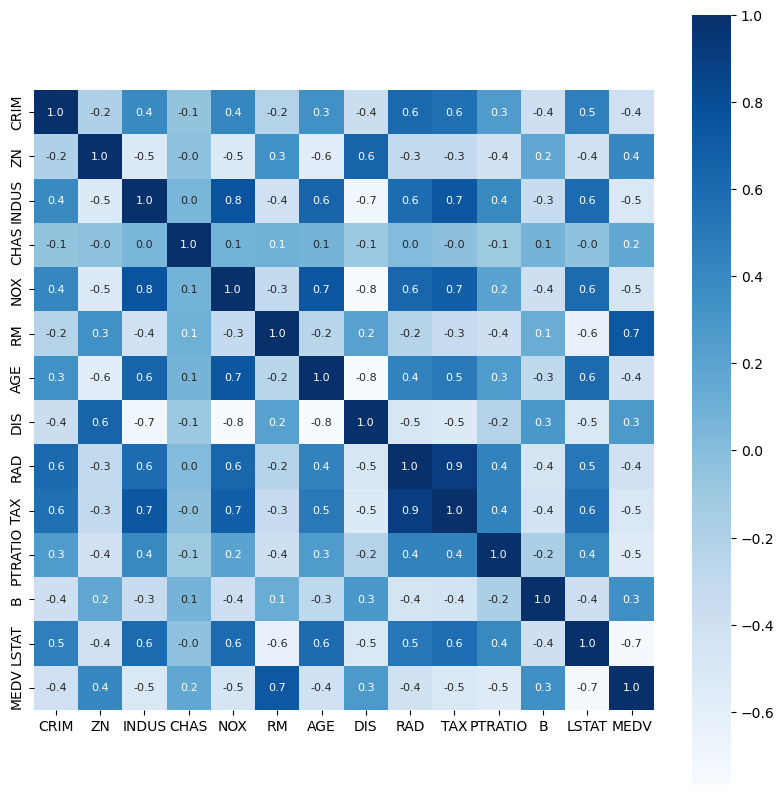

In [38]:
#Heatmap 

plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = { 'size':8}, cmap = 'Blues')

In [39]:
X = df.drop(['MEDV'], axis =1)
y = df['MEDV']

In [40]:
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
5    0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
499  0.17783   0.0   9.69   0.0  0.585  5.569  73.5  2.3999    6  391   
500  0.22438   0.0   9.69   0.0  0.585  6.027  79.7  2.4982    6  391   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state= 2)

In [42]:
model = XGBRegressor()

In [43]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [44]:
#Evaluation

#Regression = cant use accuracy score as the values are continuous
train_predict = model.predict(X_train)

In [45]:
train_predict

array([ 8.515315 , 11.499503 ,  7.502788 , 13.101762 , 19.605219 ,
       11.2944145, 49.996273 , 23.300402 , 21.70124  , 19.205254 ,
       21.696035 , 49.99746  , 49.997013 , 24.106237 , 26.604738 ,
       18.601923 , 25.000515 , 19.203    , 24.400787 , 17.723654 ,
       20.385717 , 18.098408 , 11.698106 , 13.804431 , 15.099225 ,
        9.600013 , 19.503717 , 20.804153 , 19.988901 , 19.014587 ,
       17.901104 , 33.19675  , 18.51991  , 13.397844 , 11.703735 ,
       13.597451 , 22.501274 , 24.201967 , 29.08824  , 13.79583  ,
       19.910666 , 20.59607  , 42.302    , 31.600588 , 24.799746 ,
       13.101546 , 24.295355 ,  8.704756 , 20.097921 , 29.009642 ,
        7.210577 , 23.587358 , 17.998072 , 20.384932 , 24.602375 ,
       14.09132  , 14.798142 , 22.800045 , 21.597658 , 23.700201 ,
       19.993343 , 15.596979 , 18.50475  , 23.098864 , 33.000023 ,
       28.694788 , 21.398037 , 22.192978 , 29.000921 , 20.793045 ,
       27.48526  , 12.79833  , 49.99917  , 34.90149  , 19.3004

In [53]:
#Model evaluation on TRAINING data

# R SQUARED error
rsquareError = metrics.r2_score(y_train, train_predict) 

# Mean Absolute Error
meanAbsoluteError = metrics.mean_absolute_error(y_train, train_predict)


print("R2 Score: ", rsquareError)
print("MA Error: ", meanAbsoluteError)

R2 Score:  0.9999995051405599
MA Error:  0.004473423715365267


In [47]:
train_predict.shape

(295,)

In [49]:
y_train.shape

(295,)

In [50]:
#as we can see the shape of both arrays are same. Thats why we can use this function to calculate error.

In [54]:
#Model evaluation on TESTING data

test_predict = model.predict(X_test)

# R SQUARED error
rsquareErrorTest = metrics.r2_score(y_test, test_predict) 

# Mean Absolute Error
meanAbsoluteErrorTest = metrics.mean_absolute_error(y_test, test_predict)


print("R2 Score: ", rsquareErrorTest)
print("MA Error: ", meanAbsoluteErrorTest)


R2 Score:  0.8690403539867038
MA Error:  2.1798812114831176


In [ ]:
#Classic example of OVERFITTING


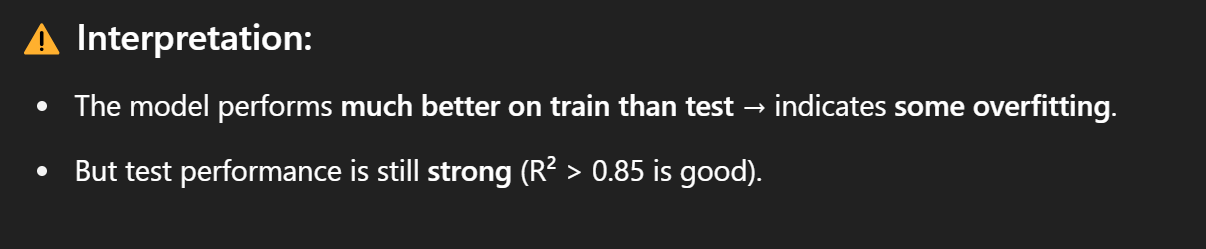

Visualising Actual vs Predicted Prices on a Scatter Plot

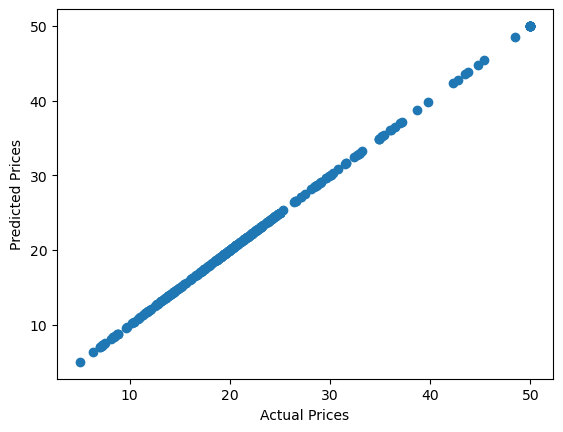

In [57]:
plt.scatter(y_train, train_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

As we can see, it is FITTED TOO WELL with poor generalisation

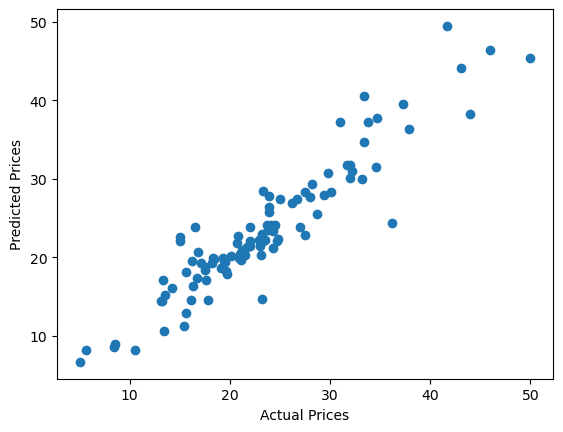

In [58]:
plt.scatter(y_test, test_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

In TEST data, the spread is more realistic BUT it is "worse" than TRAIN scatter. Classic example of OVERFITTING. Possible reason: dropping 20 rows of NaN